# Indicators

### Using BTC (other) price data from 2024-01-01 to 2024-12-31, implement the following indicators with pandas and create their respective plots.

In [3]:
# Python Packages
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# Download Historical Data
data = yf.download(tickers='BTC-USD', start ='2024-01-01', end ='2024-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
# Get Close Prices
data.columns = data.columns.droplevel(1)
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347


The Simple Moving Average over `N` periods:

$$
SMA_t = \frac{1}{N} \sum_{i=0}^{N-1} P_{t-i}
$$
1. $SME(14)$:

In [9]:
data['SMA_14'] = data['Close'].rolling(14).mean()
data['SMA_30'] = data['Close'].rolling(30).mean()
data['SMA_60'] = data['Close'].rolling(60).mean()

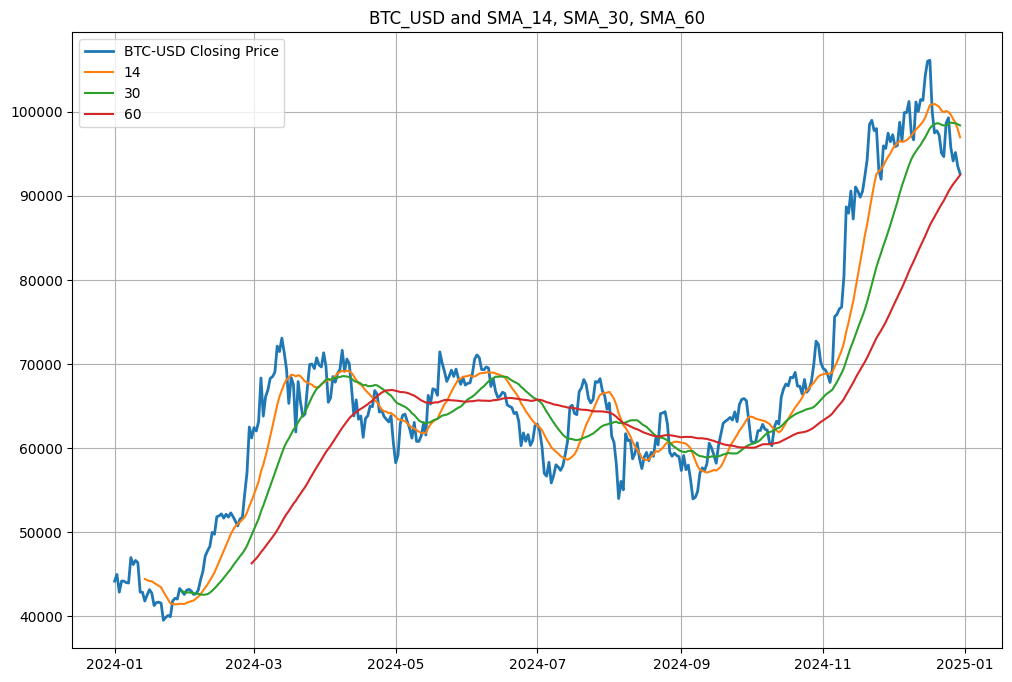

In [22]:
plt.figure(figsize=(12,8))
plt.plot(data['Close'], label='BTC-USD Closing Price', linewidth=2)
plt.plot(data['SMA_14'], label='14')
plt.plot(data['SMA_30'], label='30')
plt.plot(data['SMA_60'], label='60')
plt.title('BTC_USD and SMA_14, SMA_30, SMA_60')
plt.grid(True)
plt.legend()
plt.show()


2. $EWMA$:

The EWMA is calculated recursively as:

$$
EWMA_t = \alpha P_t + (1 - \alpha) EWMA_{t-1}
$$

where:

$
\alpha = \frac{2}{N+1}
$

In [24]:
data['EWMA_14'] = data['Close'].ewm(span=14, adjust=False).mean()
data['EWMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()
data['EWMA_60'] = data['Close'].ewm(span=60, adjust=False).mean()

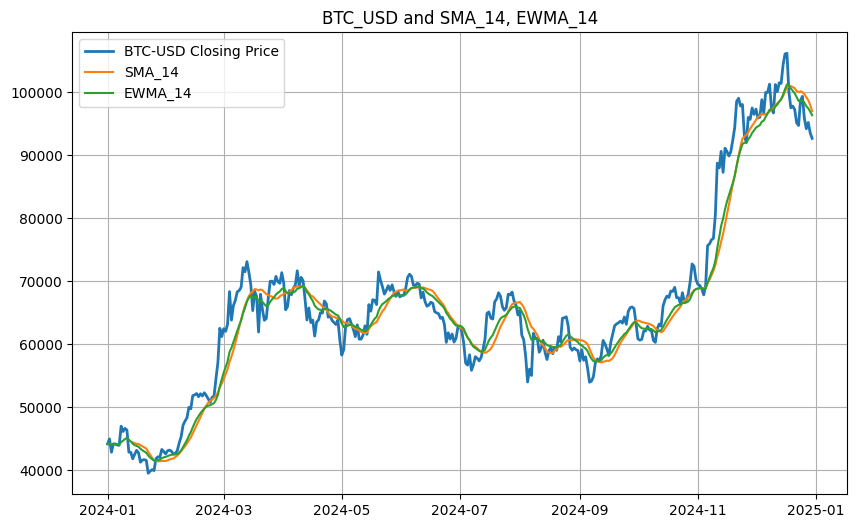

In [26]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='BTC-USD Closing Price', linewidth=2)
plt.plot(data['SMA_14'], label='SMA_14')
plt.plot(data['EWMA_14'], label='EWMA_14')
plt.title('BTC_USD and SMA_14, EWMA_14')
plt.grid(True)
plt.legend()
plt.show()


3. $Bollinger Bands$

Bollinger Bands consist of:

- Middle Band (SMA):

$$
MB_t = SMA_t
$$

- Upper Band:

$
UB_t = SMA_t + k \cdot \sigma_t
$

- Lower Band:

$
LB_t = SMA_t - k \cdot \sigma_t
$

where $\sigma_t$ is the standard deviation over `N` periods, and usually $ k = 2 $.


In [28]:
# Calculate SMA
data['SMA_16'] = data['Close'].rolling(16).mean()

# Calculate rolling STD
data['STD_16'] = data['Close'].rolling(30).std()

# Calculate rolling bands
data['Upper_band'] = data['SMA_16'] + (2 * data['STD_16'])
data['Lower_band'] = data['SMA_16'] - (2 * data['STD_16'])

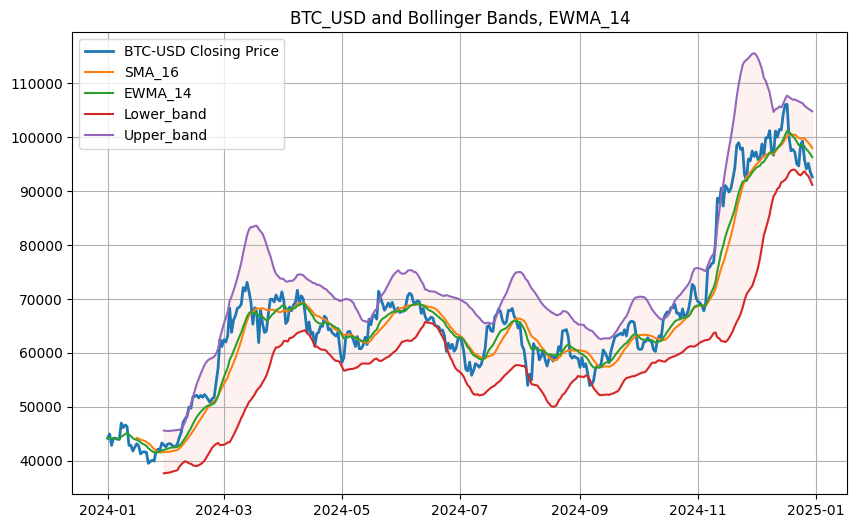

In [32]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='BTC-USD Closing Price', linewidth=2)
plt.plot(data['SMA_16'], label='SMA_16')
plt.plot(data['EWMA_14'], label='EWMA_14')
plt.plot(data['Lower_band'], label='Lower_band')
plt.plot(data['Upper_band'], label='Upper_band')
plt.fill_between(data.index, data['Lower_band'], data['Upper_band'], color='salmon', alpha=0.1)
plt.title('BTC_USD and Bollinger Bands, EWMA_14')
plt.grid(True)
plt.legend()
plt.show()


4. $MACD$:

The MACD line is:

$$
MACD_t = EMA_{12,t} - EMA_{26,t}
$$

The Signal Line is:

$
Signal_t = EMA_{9}(MACD_t)
$

The Histogram is:

$
Hist_t = MACD_t - Signal_t
$

In [34]:
# MACD line
data['EWMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EWMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

data['MACD'] = data['EWMA_12'] - data['EWMA_26']

# Signal line
data['S_line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Histogram
data['MACD_hist'] = data['MACD'] - data['S_line']


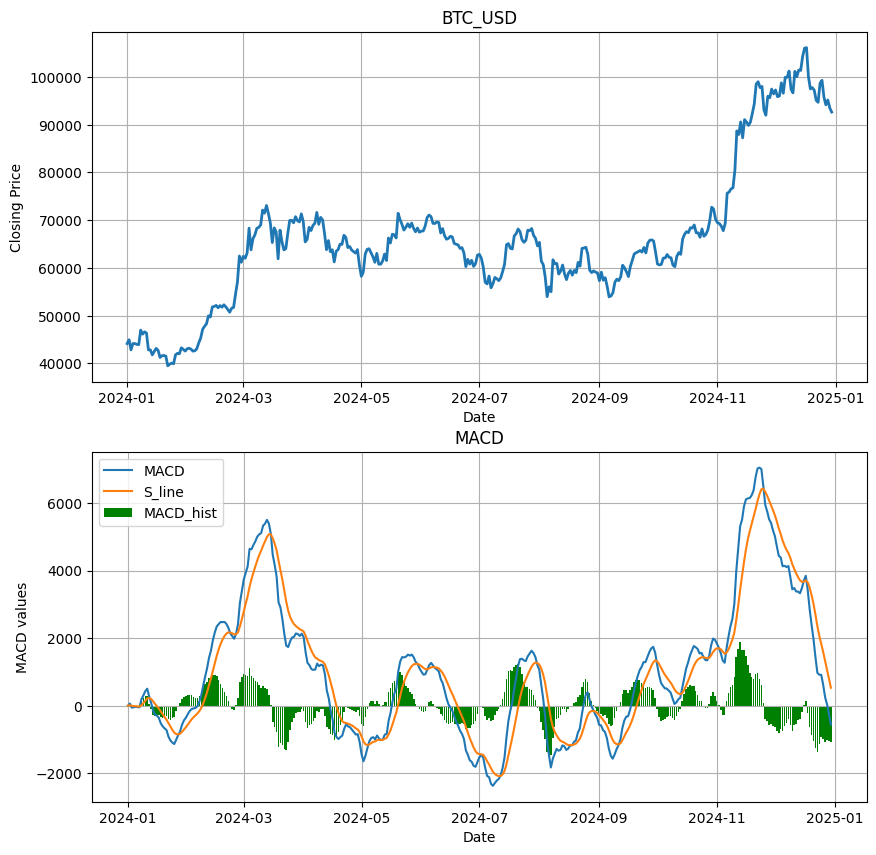

In [45]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='BTC-USD Closing Price', linewidth=2)
plt.title('BTC_USD')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD')
plt.plot(data['S_line'], label='S_line')
plt.bar(data.index, data['MACD_hist'], label='MACD_hist', color = 'green')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD values')
plt.grid()
plt.legend()
plt.show()
